In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report,confusion_matrix #,ConfusionMatrixDisplay

In [75]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
df.shape

(8523, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [79]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [80]:
# Low Fat = LF = low fat
#Regular = reg

In [81]:
df[df['Item_Fat_Content']=='LF'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.42,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.70,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
121,DRJ13,12.65,LF,0.063018,Soft Drinks,159.0578,OUT045,2002,NaN,Tier 2,Supermarket Type1,2085.9514
175,FDR47,17.85,LF,0.000000,Breads,196.5794,OUT010,1998,NaN,Tier 3,Grocery Store,585.2382
207,DRF36,16.10,LF,0.023625,Soft Drinks,189.3846,OUT045,2002,NaN,Tier 2,Supermarket Type1,3630.6074
...,...,...,...,...,...,...,...,...,...,...,...,...
8367,FDA32,NaN,LF,0.052691,Fruits and Vegetables,216.3192,OUT019,1985,Small,Tier 1,Grocery Store,215.7192
8379,FDV39,11.30,LF,0.007280,Meat,199.3426,OUT046,1997,Small,Tier 1,Supermarket Type1,2372.9112
8391,FDV15,10.30,LF,0.146172,Meat,103.3648,OUT046,1997,Small,Tier 1,Supermarket Type1,3219.8088
8443,FDX15,17.20,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404


In [82]:
df.replace(['LF','low fat'],'Low Fat',inplace=True)#['Item_Fat_Content'].value_counts()

In [83]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [84]:
df.replace(['reg'],'Regular',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [85]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
#df['Item_Identifier'].value_counts()
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [87]:
df['Outlet_Type'].value_counts() 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [88]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [89]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [90]:
# Impute missing values

In [91]:
# Checking NULL values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [92]:
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value = mean,inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [93]:
mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(mode[0],inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [94]:
# Deal with categorical variables and drop the id columns

In [95]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [96]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
data = pd.get_dummies(df,drop_first=True)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [98]:
print(data.shape)
data.columns

(8523, 28)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [99]:
x = data.drop('Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [100]:
feature_names = x.columns

In [101]:
# Preprocessing – Scaling the features

In [102]:
scalar = StandardScaler() 
scalar.fit(x)
x_scaled = scalar.transform(x)
data_x = pd.DataFrame(x_scaled,columns=feature_names)
data_x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,0.139541,-0.738147,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,...,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.641706,-0.908111,-1.489023,1.334103,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,4.260611,-0.132935,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028
2,1.098554,-0.956917,0.010040,0.139541,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
3,1.500838,-1.281758,0.660050,0.020085,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
4,-0.929428,-1.281758,-1.399220,-1.293934,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028


In [103]:
# Create train and test set

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.33, random_state=42)

In [105]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [106]:
pred = model.predict(X_test)
error = sqrt(mean_squared_error(y_test,pred))
error

1522.3123922854527

In [107]:
# Now, look at the error rate for different k values

In [108]:
rmse = []
for k in range(1,41):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    ########cross_val_score(model,X_train,y_train,cv=10)
    pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse.append(error)

Text(0.5, 1.0, 'Elbow - Curve')

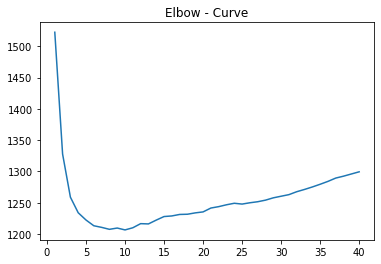

In [109]:
plt.plot(range(1,41),rmse)
plt.title('Elbow - Curve')

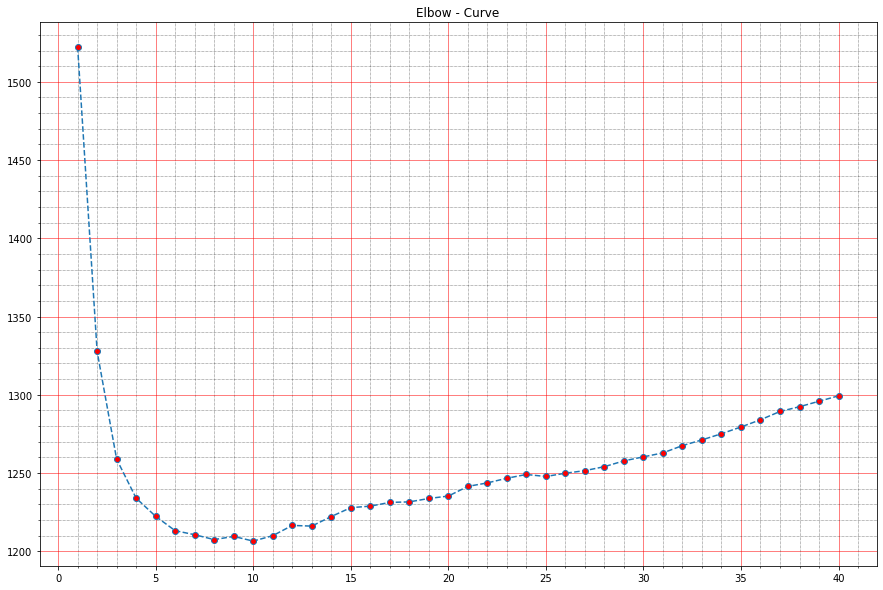

In [110]:
fig, ax = plt.subplots(figsize=(15,10))
#plt.figure(figsize=(15,10))
plt.plot(range(1,41),rmse, marker='o',linestyle = 'dashed',markerfacecolor = 'red')
plt.title('Elbow - Curve')
ax.grid(which='major',linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.minorticks_on()

In [123]:
# Implementing GridsearchCV 

In [111]:
neighbors = [i for i in range(1,40)]
#neighbors

In [121]:
knn = KNeighborsRegressor()
params = {'n_neighbors' : neighbors}
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 8}

In [122]:
knn = KNeighborsRegressor()
params = {'n_neighbors' : neighbors}
model1 = GridSearchCV(knn,params,cv=10)
model1.fit(X_train,y_train)
model1.best_params_

{'n_neighbors': 9}

In [159]:
pred = model.predict(X_test)
rmse_error = sqrt(mean_squared_error(y_test,pred))
rmse_error

1207.4444820838498

In [127]:
pred = model1.predict(X_test)
rmse_error = sqrt(mean_squared_error(y_test,pred))
rmse_error

1209.4960981813338

##  Predictions on the test dataset

In [178]:
test = pd.read_csv('Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [181]:
# For Submission File
submission = test[['Item_Identifier','Outlet_Identifier']]
#submission.head()

In [183]:
# Performing all the DATA CLEANING/PREPROCESSING steps that were performed on Train dataset

In [184]:
test.replace(['LF','low fat'],'Low Fat',inplace=True)
test.replace(['reg'],'Regular',inplace=True)
#test['Item_Fat_Content'].value_counts()

In [185]:
# Impute missing values

# Checking NULL values
test.isna().sum()

mean = test['Item_Weight'].mean()
test['Item_Weight'].fillna(value = mean,inplace=True)
mode = test['Outlet_Size'].mode()
test['Outlet_Size'].fillna(mode[0],inplace=True)
#test.isna().sum()

# Deal with categorical variables and drop the id columns

test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [186]:
test_data = pd.get_dummies(test,drop_first=True)
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [153]:
feature_names = test_data.columns

In [187]:
test_scaled = scalar.fit_transform(test_data)
test = pd.DataFrame(test_scaled,columns=feature_names)
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.897460e+00,-1.134077,-0.536555,0.139891,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,...,2.490031,-0.228116,-0.147521,0.798824,-0.623969,-0.696584,-0.804750,0.726900,-0.349374,-0.351274
1,-1.035530e+00,-0.531850,-0.868937,1.095512,1.349873,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,...,-0.401601,-0.228116,-0.147521,0.798824,-0.623969,1.435578,-0.804750,0.726900,-0.349374,-0.351274
2,4.486336e-01,0.661316,1.629848,0.020438,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,...,-0.401601,-0.228116,-0.147521,0.798824,-0.623969,-0.696584,1.242623,-1.375706,-0.349374,-0.351274
3,-1.267578e+00,-0.981416,0.226697,1.095512,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,...,2.490031,-0.228116,-0.147521,0.798824,-0.623969,1.435578,-0.804750,0.726900,-0.349374,-0.351274
4,-5.230960e-14,1.032540,1.508110,-1.532446,1.349873,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,...,-0.401601,-0.228116,-0.147521,0.798824,-0.623969,-0.696584,1.242623,-1.375706,-0.349374,2.846782


In [193]:
predict = model.predict(test)
#predict

In [199]:
submission['Item_Outlet_Sales'] = predict
submission.to_csv('SubmitFile.csv',index=False)  ## File to be submitted